# Fastest Lap Data
A Jupyter notebook looking at the fastest laps from each race. Using data from [Formula 1](https://www.formula1.com/en/results.html/2022/races.html)

The DataFrame 'fastest_lap' contains the mean (average) of the fastest laps of each driver in each race.

CSV files can be found in:
- data/fastest-laps

__HAVE YOU READ THE README FILE? PLEASE DO BEFORE USING THIS JUPYTER NOTEBOOK!__

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import re
from datetime import datetime
import time

In [3]:
%matplotlib inline

In [4]:
cf.go_offline() #allows to use cufflinks offline

# Fastest Lap DataFrame management

In [5]:
fastest_lap = pd.DataFrame()

fastest_lap = fastest_lap.assign(NO = '', DRIVER = '', RACE = '', FL = '', AVG_SPEED = '')
# rename the column header
#fastest_lap.columns = fastest_lap.columns.str.replace('SPEED', 'AVG SPEED')

fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED


In [5]:
fastest_lap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NO         0 non-null      object
 1   DRIVER     0 non-null      object
 2   RACE       0 non-null      object
 3   FL         0 non-null      object
 4   AVG_SPEED  0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes


In [6]:
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED


In [7]:
fastest_lap.describe()

,NO,DRIVER,RACE,FL,AVG_SPEED
count,0,0,0,0,0
unique,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN


In [16]:
# convert column to timedelta
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])

In [17]:
# get total seconds
fastest_lap['FL'] = fastest_lap['FL'].dt.total_seconds()

In [30]:
# get data by specific driver
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen'].mean()

/var/folders/4r/2hwrl7qs2hz_t4x5tc7910_m0000gn/T/ipykernel_83012/2161696142.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



NO                              1.0
FL           0 days 00:01:26.825000
AVG_SPEED                 226.06125
dtype: object

In [92]:
# get data by specific driver
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen']

,NO,DRIVER,RACE,FL,AVG_SPEED
55,1,Max Verstappen,BAHRAIN,0 days 00:01:35.400000,204.140
35,1,Max Verstappen,SAUDI ARABIA,0 days 00:01:31.800000,242.191
13,1,Max Verstappen,AUSTRALIA,0 days 00:01:21.700000,232.633


In [19]:
fastest_lap.to_csv('data/compiled-data/fastest-laps.csv')

# Bahrain DataFrame management

In [14]:
fl_bahrain = pd.read_csv('data/fastest-lap/fl-bahrain.csv')
fl_bahrain.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,16,Charles Leclerc,FERRARI,51,19:31:35,01:34.6,206.018
1,2,1,Max Verstappen,RED BULL RACING RBPT,51,19:31:37,01:35.4,204.140
2,3,55,Carlos Sainz,FERRARI,52,19:33:13,01:35.7,203.501
3,4,11,Sergio Perez,RED BULL RACING RBPT,52,19:33:14,01:36.1,202.762
4,5,44,Lewis Hamilton,MERCEDES,53,19:34:51,01:36.2,202.469


In [10]:
fl_bahrain.describe()

,POS,NO,LAP,AVG SPEED
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,25.800000,49.050000,201.422450
std,5.91608,21.142623,5.889107,1.812899
min,1.00000,1.000000,34.000000,198.300000
25%,5.75000,10.750000,49.000000,200.495750
50%,10.50000,21.000000,51.000000,201.180000
75%,15.25000,34.250000,53.000000,202.352000
max,20.00000,77.000000,56.000000,206.018000


# Fastest Lap from Bahrain

In [75]:
# get the fastest lap of the race
fastest_lap_bahrain = fl_bahrain.loc[0, 'TIME']
fastest_lap_bahrain_time = datetime.strptime(fastest_lap_bahrain,'%M:%S.%f')
fastest_lap_bahrain_no = fl_bahrain.loc[0, 'NO']
fastest_lap_bahrain_driver = fl_bahrain.loc[0, 'DRIVER']
fastest_lap_bahrain_speed = fl_bahrain.loc[0, 'AVG SPEED']

fastest_lap_bahrain_time.strftime('%H:%M:%S.%f')[:-5]

'00:01:34.6'

In [23]:
# add fastest driver
# add row
fastest_lap.loc[-1] = [fastest_lap_bahrain_no, fastest_lap_bahrain_driver, 'BAHRAIN', fastest_lap_bahrain_time.strftime('%H:%M:%S.%f')[:-5], fastest_lap_bahrain_speed]
# shift the index
fastest_lap.index = fastest_lap.index + 1
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED
0,16,Charles Leclerc,BAHRAIN,00:01:34.6,206.018


In [76]:
# convert column to timedelta
# RUN THIS AFTER ADDING ROW
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])

In [77]:
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED


# Fastest Lap Adding Data

In [15]:
driver_count = 0

while driver_count < len(fl_bahrain.index):
    time = fl_bahrain.loc[driver_count, 'TIME']
    driverNo = fl_bahrain.loc[driver_count, 'NO']
    name = fl_bahrain.loc[driver_count, 'DRIVER']
    avg_speed = fl_bahrain.loc[driver_count, 'AVG SPEED']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, 'BAHRAIN', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED
95,1,Max Verstappen,MIAMI,0 days 00:01:31.400000,213.255
94,16,Charles Leclerc,MIAMI,0 days 00:01:31.500000,212.959
93,55,Carlos Sainz,MIAMI,0 days 00:01:31.800000,212.258
92,11,Sergio Perez,MIAMI,0 days 00:01:31.800000,212.191
91,63,George Russell,MIAMI,0 days 00:01:32.200000,211.325


In [12]:
fastest_lap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 19 to 0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   NO         20 non-null     int64          
 1   DRIVER     20 non-null     object         
 2   RACE       20 non-null     object         
 3   FL         20 non-null     timedelta64[ns]
 4   AVG_SPEED  20 non-null     float64        
dtypes: float64(1), int64(1), object(2), timedelta64[ns](1)
memory usage: 960.0+ bytes


In [13]:
fastest_lap.describe()

,NO,FL,AVG_SPEED
count,20.000000,20,20.000000
mean,25.800000,0 days 00:01:36.735000,201.422450
std,21.142623,0 days 00:00:00.874958645,1.812899
min,1.000000,0 days 00:01:34.600000,198.300000
25%,10.750000,0 days 00:01:36.275000,200.495750
50%,21.000000,0 days 00:01:36.850000,201.180000
75%,34.250000,0 days 00:01:37.150000,202.352000
max,77.000000,0 days 00:01:38.300000,206.018000


In [14]:
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED
19,16,Charles Leclerc,BAHRAIN,0 days 00:01:34.600000,206.018
18,1,Max Verstappen,BAHRAIN,0 days 00:01:35.400000,204.140
17,55,Carlos Sainz,BAHRAIN,0 days 00:01:35.700000,203.501
16,11,Sergio Perez,BAHRAIN,0 days 00:01:36.100000,202.762
15,44,Lewis Hamilton,BAHRAIN,0 days 00:01:36.200000,202.469


In [54]:
# get data by specific driver
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen']

,NO,DRIVER,RACE,FL,AVG_SPEED
18,1,Max Verstappen,BAHRAIN,0 days 00:01:35.400000,204.14


In [55]:
#calculate the mean of the fastest laps and assign to variable
fl_mean = fastest_lap['FL'].mean()

In [48]:
# display total seconds
fl_mean.total_seconds()

96.735

In [56]:
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED
19,16,Charles Leclerc,BAHRAIN,0 days 00:01:34.600000,206.018
18,1,Max Verstappen,BAHRAIN,0 days 00:01:35.400000,204.140
17,55,Carlos Sainz,BAHRAIN,0 days 00:01:35.700000,203.501
16,11,Sergio Perez,BAHRAIN,0 days 00:01:36.100000,202.762
15,44,Lewis Hamilton,BAHRAIN,0 days 00:01:36.200000,202.469


# Saudi Arabia DataFrame management

In [12]:
fl_saudi_arabia = pd.read_csv('data/fastest-lap/fl-saudi-arabia.csv')
fl_saudi_arabia.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,16,Charles Leclerc,FERRARI,48,21:24:43,01:31.6,242.556
1,2,1,Max Verstappen,RED BULL RACING RBPT,50,21:27:46,01:31.8,242.191
2,3,55,Carlos Sainz,FERRARI,48,21:24:50,01:31.9,241.841
3,4,11,Sergio Perez,RED BULL RACING RBPT,46,21:21:47,01:32.0,241.481
4,5,4,Lando Norris,MCLAREN MERCEDES,46,21:22:26,01:32.8,239.629


In [13]:
driver_count = 0

while driver_count < len(fl_saudi_arabia.index):
    time = fl_saudi_arabia.loc[driver_count, 'TIME']
    driverNo = fl_saudi_arabia.loc[driver_count, 'NO']
    name = fl_saudi_arabia.loc[driver_count, 'DRIVER']
    avg_speed = fl_saudi_arabia.loc[driver_count, 'AVG SPEED']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, 'SAUDI ARABIA', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED
75,1,Max Verstappen,MIAMI,0 days 00:01:31.400000,213.255
74,16,Charles Leclerc,MIAMI,0 days 00:01:31.500000,212.959
73,55,Carlos Sainz,MIAMI,0 days 00:01:31.800000,212.258
72,11,Sergio Perez,MIAMI,0 days 00:01:31.800000,212.191
71,63,George Russell,MIAMI,0 days 00:01:32.200000,211.325


# Australia DataFrame management

In [10]:
fl_australia = pd.read_csv('data/fastest-lap/fl-australia.csv')
fl_australia.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,16,Charles Leclerc,FERRARI,58,16:30:59,01:20.3,236.740
1,2,14,Fernando Alonso,ALPINE RENAULT,57,16:31:30,01:20.8,235.024
2,3,11,Sergio Perez,RED BULL RACING RBPT,58,16:31:20,01:21.1,234.305
3,4,63,George Russell,MERCEDES,53,16:24:35,01:21.5,233.152
4,5,77,Valtteri Bottas,ALFA ROMEO FERRARI,54,16:26:39,01:21.7,232.707


In [18]:
fl_australia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POS          19 non-null     int64  
 1   NO           19 non-null     int64  
 2   DRIVER       19 non-null     object 
 3   CAR          19 non-null     object 
 4   LAP          19 non-null     int64  
 5   TIME OF DAY  19 non-null     object 
 6   TIME         19 non-null     object 
 7   AVG SPEED    19 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.3+ KB


In [88]:
len(fl_australia.index)

19

In [11]:
driver_count = 0

while driver_count < len(fl_australia.index):
    time = fl_australia.loc[driver_count, 'TIME']
    driverNo = fl_australia.loc[driver_count, 'NO']
    name = fl_australia.loc[driver_count, 'DRIVER']
    avg_speed = fl_australia.loc[driver_count, 'AVG SPEED']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, 'AUSTRALIA', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED
57,1,Max Verstappen,MIAMI,0 days 00:01:31.400000,213.255
56,16,Charles Leclerc,MIAMI,0 days 00:01:31.500000,212.959
55,55,Carlos Sainz,MIAMI,0 days 00:01:31.800000,212.258
54,11,Sergio Perez,MIAMI,0 days 00:01:31.800000,212.191
53,63,George Russell,MIAMI,0 days 00:01:32.200000,211.325


# Italy DataFrame Management

In [8]:
fl_italy = pd.read_csv('data/fastest-lap/fl-italy.csv')
fl_italy.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,1,Max Verstappen,RED BULL RACING RBPT,55,16:24:32,01:18.4,225.281
1,2,16,Charles Leclerc,FERRARI,63,16:36:07,01:18.6,224.914
2,3,11,Sergio Perez,RED BULL RACING RBPT,52,16:20:46,01:18.9,223.845
3,4,47,Mick Schumacher,HAAS FERRARI,55,16:26:33,01:19.0,223.704
4,5,22,Yuki Tsunoda,ALPHATAURI RBPT,61,16:33:29,01:20.5,219.412


In [11]:
fl_italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POS          19 non-null     int64  
 1   NO           19 non-null     int64  
 2   DRIVER       19 non-null     object 
 3   CAR          19 non-null     object 
 4   LAP          19 non-null     int64  
 5   TIME OF DAY  19 non-null     object 
 6   TIME         19 non-null     object 
 7   AVG SPEED    19 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.3+ KB


In [9]:
driver_count = 0

while driver_count < len(fl_italy.index):
    time = fl_italy.loc[driver_count, 'TIME']
    driverNo = fl_italy.loc[driver_count, 'NO']
    name = fl_italy.loc[driver_count, 'DRIVER']
    avg_speed = fl_italy.loc[driver_count, 'AVG SPEED']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, 'ITALY', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED
38,1,Max Verstappen,MIAMI,0 days 00:01:31.400000,213.255
37,16,Charles Leclerc,MIAMI,0 days 00:01:31.500000,212.959
36,55,Carlos Sainz,MIAMI,0 days 00:01:31.800000,212.258
35,11,Sergio Perez,MIAMI,0 days 00:01:31.800000,212.191
34,63,George Russell,MIAMI,0 days 00:01:32.200000,211.325


# Miami DataFrame Management

In [6]:
fl_miami = pd.read_csv('data/fastest-lap/fl-miami.csv')
fl_miami.head()

,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED
0,1,1,Max Verstappen,RED BULL RACING RBPT,54,17:03:04,01:31.4,213.255
1,2,16,Charles Leclerc,FERRARI,53,17:01:34,01:31.5,212.959
2,3,55,Carlos Sainz,FERRARI,56,17:06:15,01:31.8,212.258
3,4,11,Sergio Perez,RED BULL RACING RBPT,54,17:03:13,01:31.8,212.191
4,5,63,George Russell,MERCEDES,56,17:06:25,01:32.2,211.325


In [7]:
driver_count = 0

while driver_count < len(fl_miami.index):
    time = fl_miami.loc[driver_count, 'TIME']
    driverNo = fl_miami.loc[driver_count, 'NO']
    name = fl_miami.loc[driver_count, 'DRIVER']
    avg_speed = fl_miami.loc[driver_count, 'AVG SPEED']
    if time == 'DNF':
        driver_count += 1
    else:
        #time = re.sub(r'[^0-9.]', '', time)
        #timeFloat = float(time)
        formattedTime = datetime.strptime(time,'%M:%S.%f')
        formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
        #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
        # add row
        fastest_lap.loc[-1] = [driverNo, name, 'MIAMI', formattedTime, avg_speed]
        # shift the index
        fastest_lap.index = fastest_lap.index + 1
        driver_count += 1

# CONVERT FL COLUMN TO TIMEDELTA FORMAT
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
fastest_lap.head()

,NO,DRIVER,RACE,FL,AVG_SPEED
19,1,Max Verstappen,MIAMI,0 days 00:01:31.400000,213.255
18,16,Charles Leclerc,MIAMI,0 days 00:01:31.500000,212.959
17,55,Carlos Sainz,MIAMI,0 days 00:01:31.800000,212.258
16,11,Sergio Perez,MIAMI,0 days 00:01:31.800000,212.191
15,63,George Russell,MIAMI,0 days 00:01:32.200000,211.325


# Plotting Work

<AxesSubplot:title={'center':'Max Verstappen'}, xlabel='RACE'>

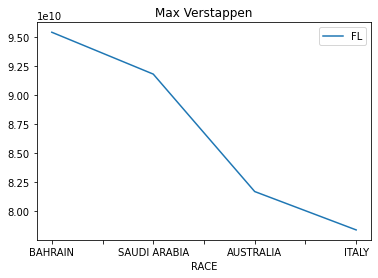

In [49]:
#avg speed
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen'].plot.line(x='RACE', y='FL', title='Max Verstappen')

In [54]:
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen']['FL']

74   0 days 00:01:35.400000
54   0 days 00:01:31.800000
32   0 days 00:01:21.700000
18   0 days 00:01:18.400000
Name: FL, dtype: timedelta64[ns]

# Experiment to convert TimeDelta to seconds

In [55]:
test_df = fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen']['FL']

In [58]:
test_df.head()

74   0 days 00:01:35.400000
54   0 days 00:01:31.800000
32   0 days 00:01:21.700000
18   0 days 00:01:18.400000
Name: FL, dtype: timedelta64[ns]

In [62]:
test_df.info()

<class 'pandas.core.series.Series'>
Int64Index: 4 entries, 74 to 18
Series name: FL
Non-Null Count  Dtype  
--------------  -----  
4 non-null      float64
dtypes: float64(1)
memory usage: 64.0 bytes


In [61]:
test_df = test_df.dt.total_seconds()

In [63]:
test_df_2 = fastest_lap

In [67]:
test_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 75 to 0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NO         76 non-null     int64  
 1   DRIVER     76 non-null     object 
 2   RACE       76 non-null     object 
 3   FL         76 non-null     float64
 4   AVG_SPEED  76 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.6+ KB


In [66]:
test_df_2['FL'] = test_df_2['FL'].dt.total_seconds()